In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

In [7]:
DATASETS_PATH = 'data/Arrival_Departure/Working'
MASTER_DATASET = 'post_covid'
MASTER_DATASET_PATH = os.path.join(DATASETS_PATH, MASTER_DATASET)

In [9]:
def parse_time(time_str):
    """Convert HH:MM format to minutes."""
    try:
        hours, minutes = map(int, time_str.split(':'))
        return hours * 60 + minutes
    except ValueError:
        return None

In [99]:
def process_mbta_data(directory):
    """Calculate the average delay per stop per route per day for each month separately."""
    all_files = glob.glob(os.path.join(directory, "covid.csv"))
    # all_files = ["Datasets/MBTA_Bus_Arrival_Departure_Times_2021/MBTA-Bus-Arrival-Departure-Times_2021-01.csv"]
    all_data = []
    for file in all_files:
        print(f"Processing {file}...")
        df = pd.read_csv(file)  
        
        df = df.astype({
        'service_date': 'string',
        'scheduled': 'string',
        'actual': 'string'
        })
        
        df[['service_date', 'scheduled', 'actual']] = df[['service_date', 'scheduled', 'actual']].apply(pd.to_datetime, errors='coerce')
        df['delay'] = (df['actual'] - df['scheduled']).dt.total_seconds() / 60
        avg_delays = df.groupby(['service_date', 'route_id', 'stop_id'])['delay'].mean().reset_index()
        all_data.append(avg_delays)
    final_df = pd.concat(all_data, ignore_index=True)
    output_file = os.path.join(directory, 'average_delay_covid.csv')
    final_df.to_csv(output_file, index=False)
    print("Done")


In [83]:
directory = "data/Arrival_Departure/Working/"  # Replace with actual path
process_mbta_data(directory)

Processing data/Arrival_Departure/Working/covid.csv...
s1
s2
s3
s4
s5


In [84]:
d = "data/Arrival_Departure/Working/average_delay_covid.csv"
df = pd.read_csv(d)

df['service_date'] = pd.to_datetime(df['service_date']).dt.to_period('M')
print(df[df['route_id'] == '01'])
df['delay'] = df['delay'].clip(lower=0)
print(df[df['route_id'] == '01']['delay'].sum())
bus_wise_delay = df.groupby(['service_date', 'route_id'])['delay'].mean().reset_index()
bus_wise_delay.to_csv('data/Arrival_Departure/Working/average_delay_covid_final.csv', index=False)


        service_date route_id  stop_id     delay
0            2020-01       01      2.0  3.557598
1            2020-01       01     59.0 -3.503196
2            2020-01       01     62.0 -3.828704
3            2020-01       01     64.0 -0.395499
4            2020-01       01     67.0  0.373059
...              ...      ...      ...       ...
1920460      2022-12       01    108.0  6.638301
1920461      2022-12       01    110.0  1.534863
1920462      2022-12       01    187.0  3.504762
1920463      2022-12       01    188.0  5.544127
1920464      2022-12       01  10590.0  4.385256

[17203 rows x 4 columns]
65322.88840790176


<Figure size 1400x700 with 0 Axes>

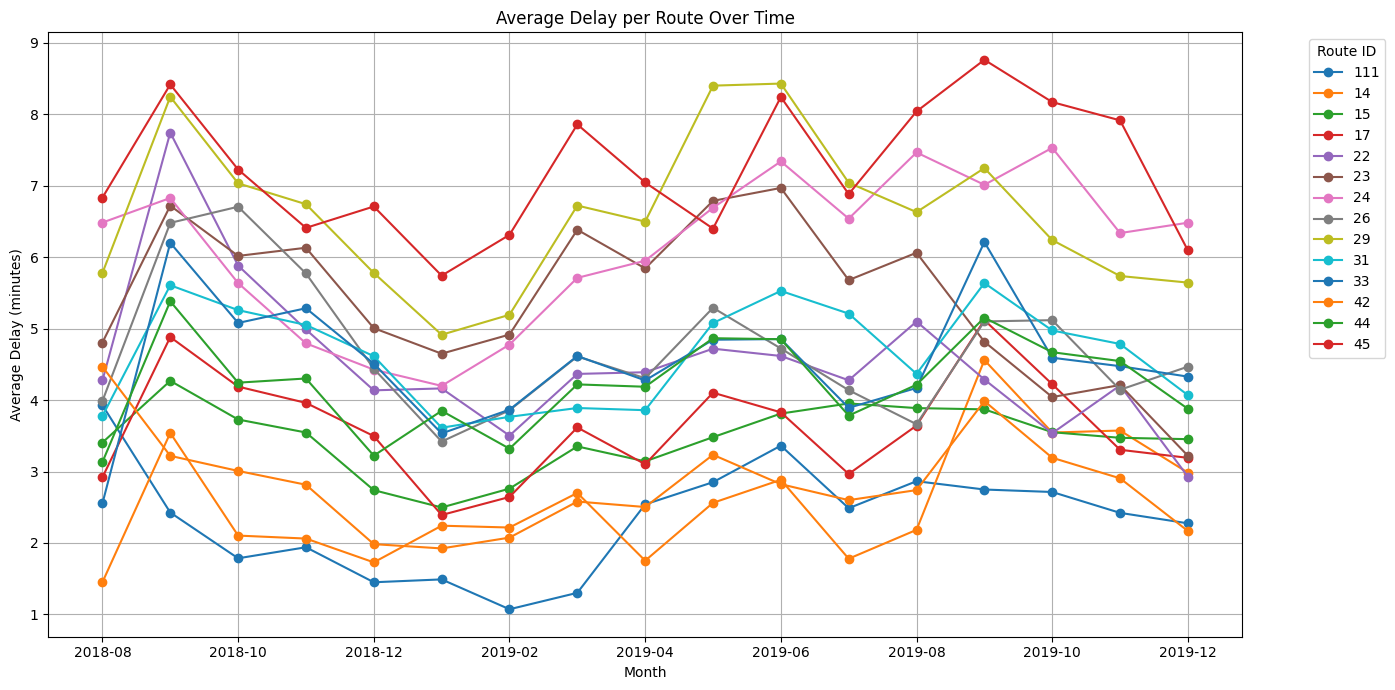

<Figure size 1400x700 with 0 Axes>

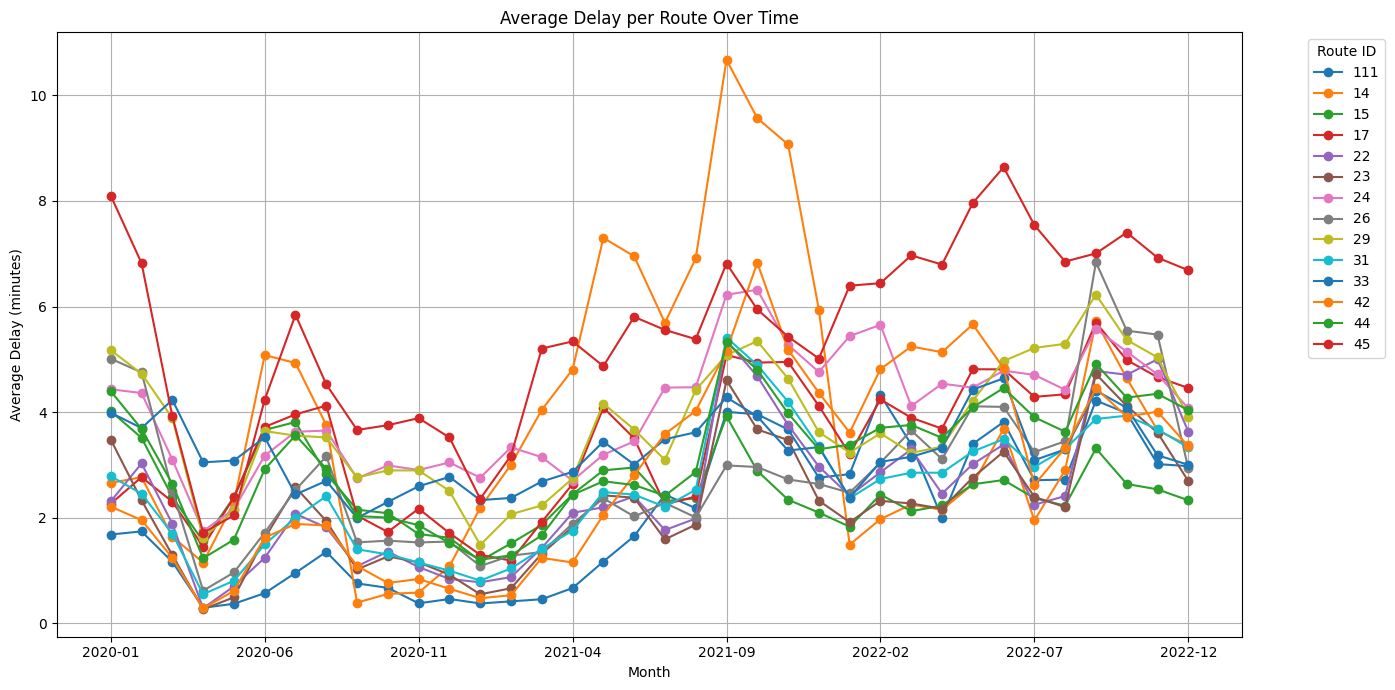

<Figure size 1400x700 with 0 Axes>

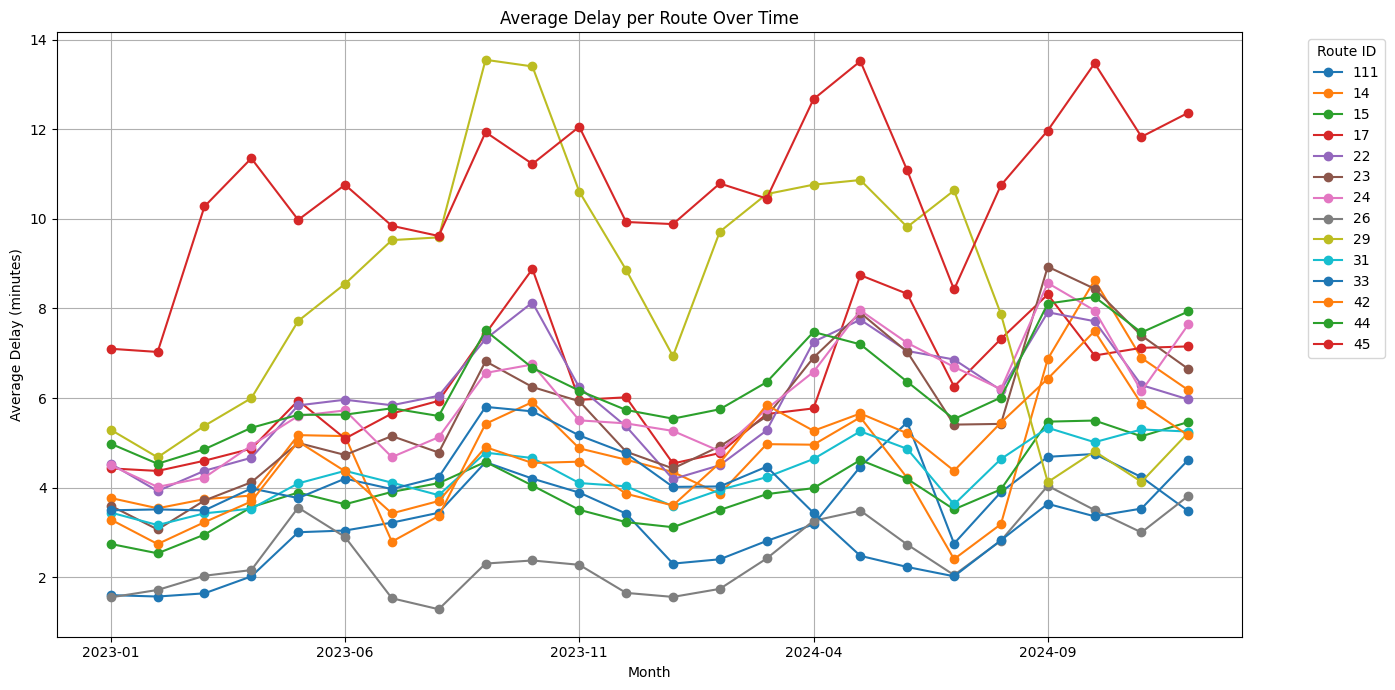

In [87]:
d = "data/Arrival_Departure/Working/average_delay_pre_covid_final.csv"
pre_route_delays = pd.read_csv(d)
d = "data/Arrival_Departure/Working/average_delay_post_covid_final.csv"
post_route_delays = pd.read_csv(d)
d = "data/Arrival_Departure/Working/average_delay_covid_final.csv"
cov_route_delays = pd.read_csv(d)

imp_routes = [ '22', '29', '15', '45', '44', '42', '17', '23', '31', '26', '111', '24', '33', '14']

pre_delays_for_imp_routes = pre_route_delays[pre_route_delays['route_id'].isin(imp_routes)]
pre_df = pre_delays_for_imp_routes.pivot(index='service_date', columns='route_id', values='delay')

cov_delays_for_imp_routes = cov_route_delays[cov_route_delays['route_id'].isin(imp_routes)]
cov_df = cov_delays_for_imp_routes.pivot(index='service_date', columns='route_id', values='delay')

post_delays_for_imp_routes = post_route_delays[post_route_delays['route_id'].isin(imp_routes)]
post_df = post_delays_for_imp_routes.pivot(index='service_date', columns='route_id', values='delay')

# Pre
plt.figure(figsize=(14, 7))
pre_df.plot(marker='o', figsize=(14, 7))

plt.title("Average Delay per Route Over Time")
plt.xlabel("Month")
plt.ylabel("Average Delay (minutes)")
plt.legend(title="Route ID", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Cov
plt.figure(figsize=(14, 7))
cov_df.plot(marker='o', figsize=(14, 7))

plt.title("Average Delay per Route Over Time")
plt.xlabel("Month")
plt.ylabel("Average Delay (minutes)")
plt.legend(title="Route ID", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Post
plt.figure(figsize=(14, 7))
post_df.plot(marker='o', figsize=(14, 7))

plt.title("Average Delay per Route Over Time")
plt.xlabel("Month")
plt.ylabel("Average Delay (minutes)")
plt.legend(title="Route ID", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

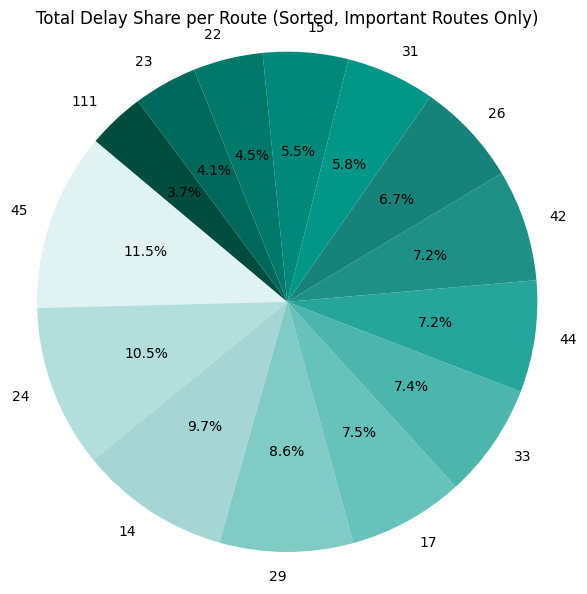

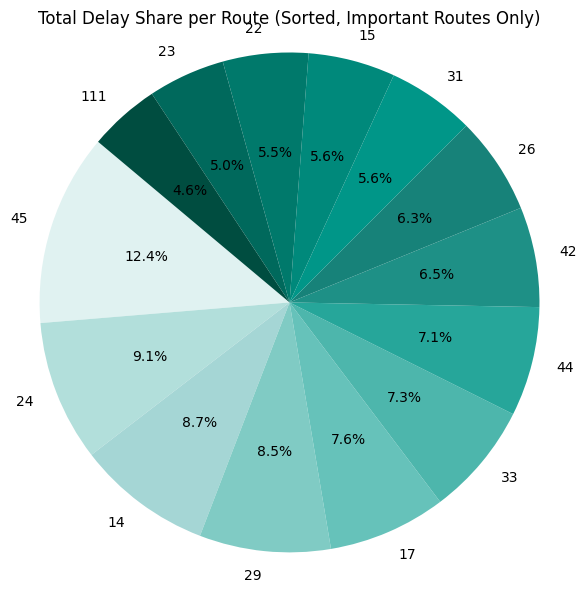

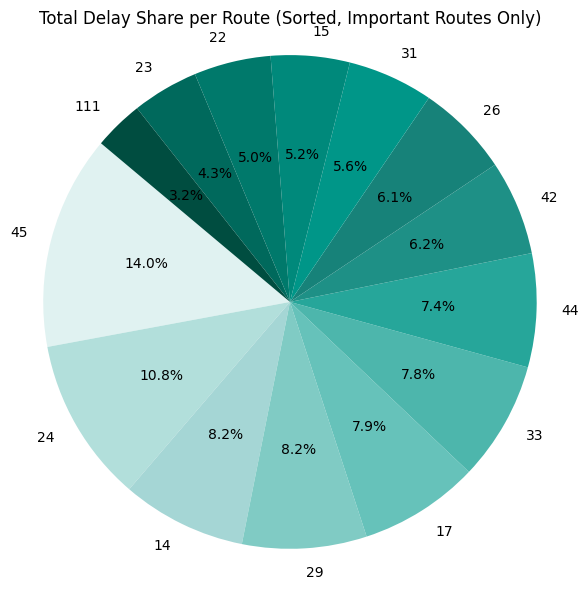

In [98]:
imp_routes = ['22', '29', '15', '45', '44', '42', '17', '23', '31', '26', '111', '24', '33', '14']

pre_route_delay_sum = pre_delays_for_imp_routes.groupby('route_id')['delay'].sum()
pre_route_delay_sum = pre_route_delay_sum.sort_values(ascending=False)

cov_route_delay_sum = cov_delays_for_imp_routes.groupby('route_id')['delay'].sum()
cov_route_delay_sum = cov_route_delay_sum.sort_values(ascending=False)

post_route_delay_sum = post_delays_for_imp_routes.groupby('route_id')['delay'].sum()
post_route_delay_sum = post_route_delay_sum.sort_values(ascending=False)

# color_palette = ["Maroon", "Grey", "Olive", "Teal", "Navy", "Black", "Red", "Orange", "Yellow", "Green", "Cyan", "Blue", "Purple", "Magenta"]
color_palette = [
    "#E0F2F1",  
    "#B2DFDB",  
    "#A5D6D5",  
    "#80CBC4",  
    "#66C2BA",  
    "#4DB6AC",  
    "#26A69A",  
    "#1E9086",  
    "#178279",  
    "#009688",  
    "#00897B",  
    "#00796B",  
    "#00695C",  
    "#004D40"   
]

plt.figure(figsize=(6, 6))
plt.pie(
    pre_route_delay_sum,
    labels=route_delay_sum.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=color_palette[:len(route_delay_sum)]
)
plt.title('Total Delay Share per Route (Sorted, Important Routes Only)')
plt.axis('equal')  # Equal aspect ratio ensures a perfect circle
plt.tight_layout()
plt.show()
print('\n\n\n')
plt.figure(figsize=(6, 6))
plt.pie(
    cov_route_delay_sum,
    labels=route_delay_sum.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=color_palette[:len(route_delay_sum)]
)
plt.title('Total Delay Share per Route (Sorted, Important Routes Only)')
plt.axis('equal')  # Equal aspect ratio ensures a perfect circle
plt.tight_layout()
plt.show()
print('\n\n\n')
plt.figure(figsize=(6, 6))
plt.pie(
    post_route_delay_sum,
    labels=route_delay_sum.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=color_palette[:len(route_delay_sum)]
)
plt.title('Total Delay Share per Route (Sorted, Important Routes Only)')
plt.axis('equal')  # Equal aspect ratio ensures a perfect circle
plt.tight_layout()
plt.show()